# TP 2 Robotica movil
## Ejercicio 5

Escribir un script en **Python** que cargue los datos del archivo `log` y genere gráficos de:

a. El camino seguido por el robot.  
b. La trayectoria (pose respecto al tiempo).  
c. La velocidad del robot respecto al tiempo. 

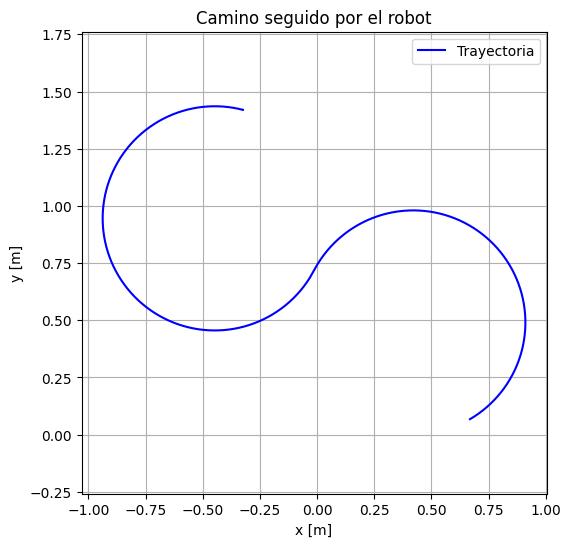

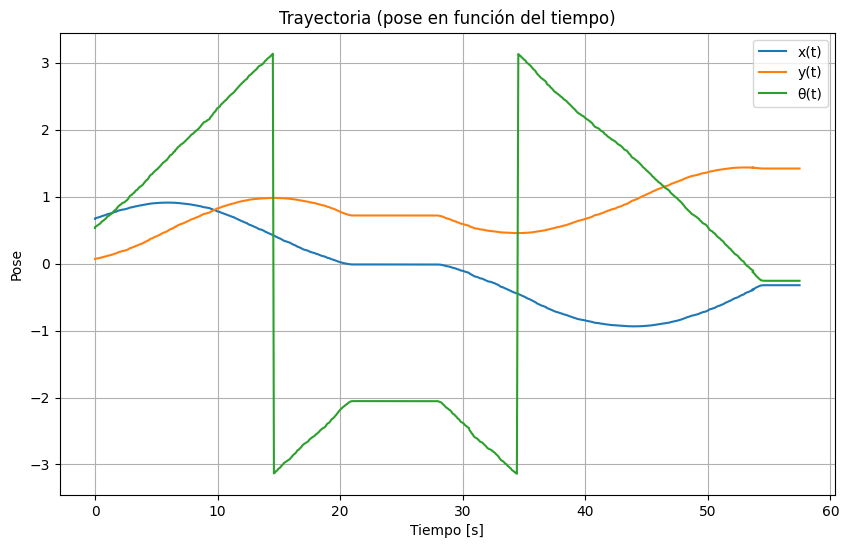

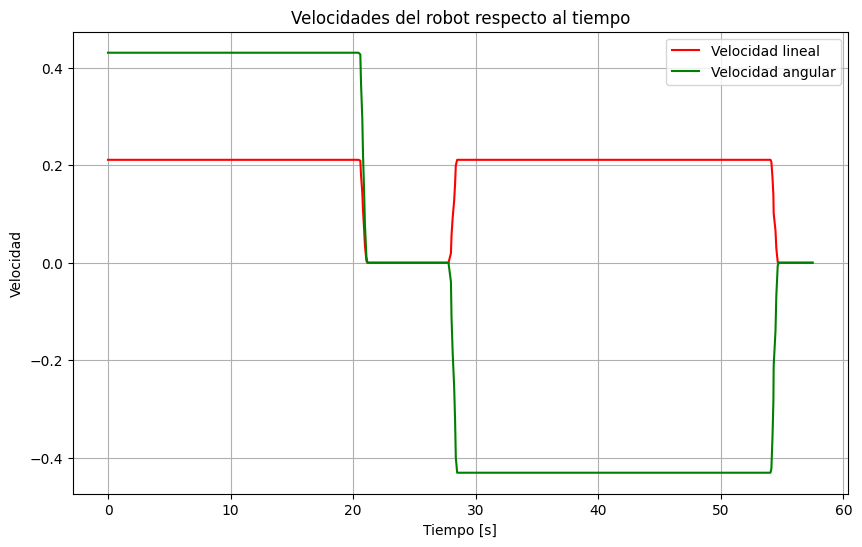

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import re

def parse_ros_time(s):
    """
    Convierte 'builtin_interfaces.msg.Time(sec=..., nanosec=...)' a segundos en float
    """
    match = re.search(r"sec=(\d+), nanosec=(\d+)", str(s))
    if match:
        sec = int(match.group(1))
        nsec = int(match.group(2))
        return sec + nsec * 1e-9
    else:
        return None   

# -------------------------------
# Cargar archivo txt 
# -------------------------------
logfile = "C:/Users/Geronimo/OneDrive - Facultad de Ingeniería - UNLP/01-Doctorado/03-Cursos/09-Robotica_Movil/02- Practica/Git/Robotica-movil/TP-2/Logs-graficas/Ej_4.txt"


data = pd.read_csv(
    logfile,
    sep="\t",
    header=None,
    engine="python",
    on_bad_lines="skip"
)

# Renombrar columnas
data.columns = ["ros_time", "x", "y", "theta", "v_lin", "v_ang"]

# Parsear timestamps (algunos quedarán NaN si eran inválidos)
data["time"] = data["ros_time"].apply(parse_ros_time)

# Quitar filas inválidas
data = data.dropna(subset=["time"])

# Tiempo relativo
data["t_rel"] = data["time"] - data["time"].iloc[0]

# -------------------------------
# a) Camino seguido por el robot
# -------------------------------
plt.figure(figsize=(6,6))
plt.plot(data["x"], data["y"], 'b-', label="Trayectoria")
plt.xlabel("x [m]")
plt.ylabel("y [m]")
plt.title("Camino seguido por el robot")
plt.axis("equal")
plt.grid()
plt.legend()

# -------------------------------
# b) Trayectoria (pose vs tiempo)
# -------------------------------
plt.figure(figsize=(10,6))
plt.plot(data["t_rel"], data["x"], label="x(t)")
plt.plot(data["t_rel"], data["y"], label="y(t)")
plt.plot(data["t_rel"], data["theta"], label="θ(t)")
plt.xlabel("Tiempo [s]")
plt.ylabel("Pose")
plt.title("Trayectoria (pose en función del tiempo)")
plt.legend()
plt.grid()

# -------------------------------
# c) Velocidades
# -------------------------------
plt.figure(figsize=(10,6))
plt.plot(data["t_rel"], data["v_lin"], 'r-', label="Velocidad lineal")
plt.plot(data["t_rel"], data["v_ang"], 'g-', label="Velocidad angular")
plt.xlabel("Tiempo [s]")
plt.ylabel("Velocidad")
plt.title("Velocidades del robot respecto al tiempo")
plt.legend()
plt.grid()

plt.show()


## Ejercicio 6
Obtener otro registro de datos para un camino circular del robot y graficar el camino y la trayectoria.

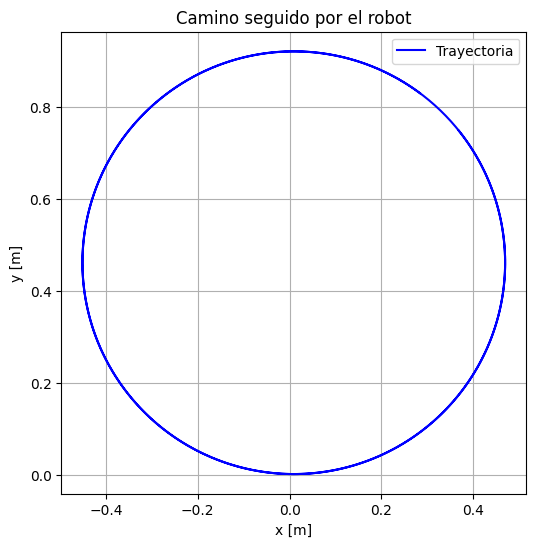

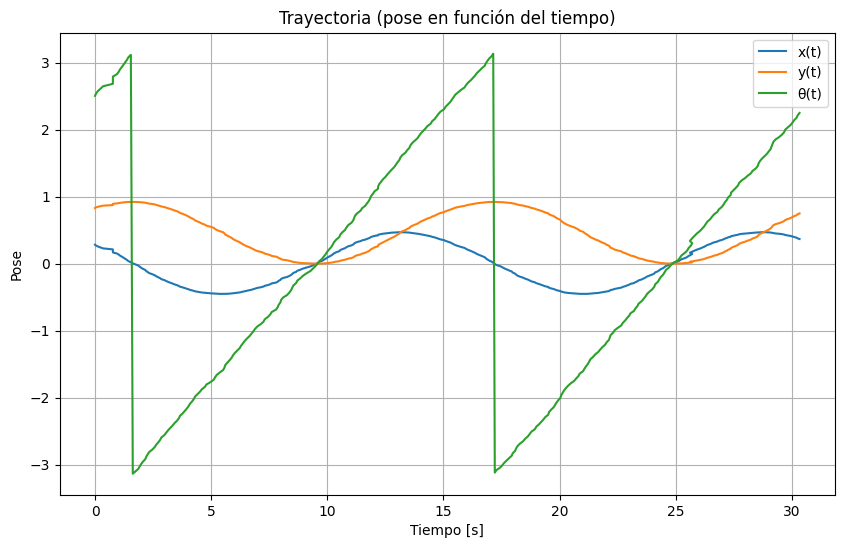

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import re

def parse_ros_time(s):
    """
    Convierte 'builtin_interfaces.msg.Time(sec=..., nanosec=...)' a segundos en float
    """
    match = re.search(r"sec=(\d+), nanosec=(\d+)", str(s))
    if match:
        sec = int(match.group(1))
        nsec = int(match.group(2))
        return sec + nsec * 1e-9
    else:
        return None   

# -------------------------------
# Cargar archivo txt 
# -------------------------------
logfile = "C:/Users/Geronimo/OneDrive - Facultad de Ingeniería - UNLP/01-Doctorado/03-Cursos/09-Robotica_Movil/02- Practica/Git/Robotica-movil/TP-2/Logs-graficas/Ej_6.txt"


data = pd.read_csv(
    logfile,
    sep="\t",
    header=None,
    engine="python",
    on_bad_lines="skip"
)

# Renombrar columnas
data.columns = ["ros_time", "x", "y", "theta", "v_lin", "v_ang"]

# Parsear timestamps (algunos quedarán NaN si eran inválidos)
data["time"] = data["ros_time"].apply(parse_ros_time)

# Quitar filas inválidas
data = data.dropna(subset=["time"])

# Tiempo relativo
data["t_rel"] = data["time"] - data["time"].iloc[0]

# -------------------------------
# a) Camino seguido por el robot
# -------------------------------
plt.figure(figsize=(6,6))
plt.plot(data["x"], data["y"], 'b-', label="Trayectoria")
plt.xlabel("x [m]")
plt.ylabel("y [m]")
plt.title("Camino seguido por el robot")
plt.axis("equal")
plt.grid()
plt.legend()

# -------------------------------
# b) Trayectoria (pose vs tiempo)
# -------------------------------
plt.figure(figsize=(10,6))
plt.plot(data["t_rel"], data["x"], label="x(t)")
plt.plot(data["t_rel"], data["y"], label="y(t)")
plt.plot(data["t_rel"], data["theta"], label="θ(t)")
plt.xlabel("Tiempo [s]")
plt.ylabel("Pose")
plt.title("Trayectoria (pose en función del tiempo)")
plt.legend()
plt.grid()

plt.show()


## Ejercicio 7

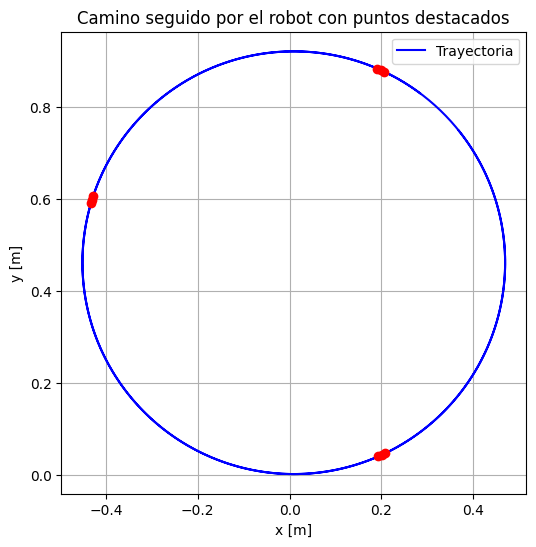

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# Margen para considerar “aproximadamente igual”
epsilon = 0.01  # ajusta según tus datos

# -------------------------------
# Todos los índices donde X ≈ 0.2
# -------------------------------
idx_x_02 = data.index[np.abs(data["x"] - 0.2) < epsilon]

# Todos los índices donde Y ≈ 0.6 y X < 0
idx_y_06_x_neg = data.index[(np.abs(data["y"] - 0.6) < epsilon) & (data["x"] < 0)]

# -------------------------------
# Camino seguido por el robot
# -------------------------------
plt.figure(figsize=(6,6))
plt.plot(data["x"], data["y"], 'b-', label="Trayectoria")

# Marcar los puntos
plt.plot(data.loc[idx_x_02, "x"], data.loc[idx_x_02, "y"], 'ro')
plt.plot(data.loc[idx_y_06_x_neg, "x"], data.loc[idx_y_06_x_neg, "y"], 'ro')

plt.xlabel("x [m]")
plt.ylabel("y [m]")
plt.title("Camino seguido por el robot con puntos destacados")
plt.legend()
plt.axis("equal")
plt.grid()
plt.show()


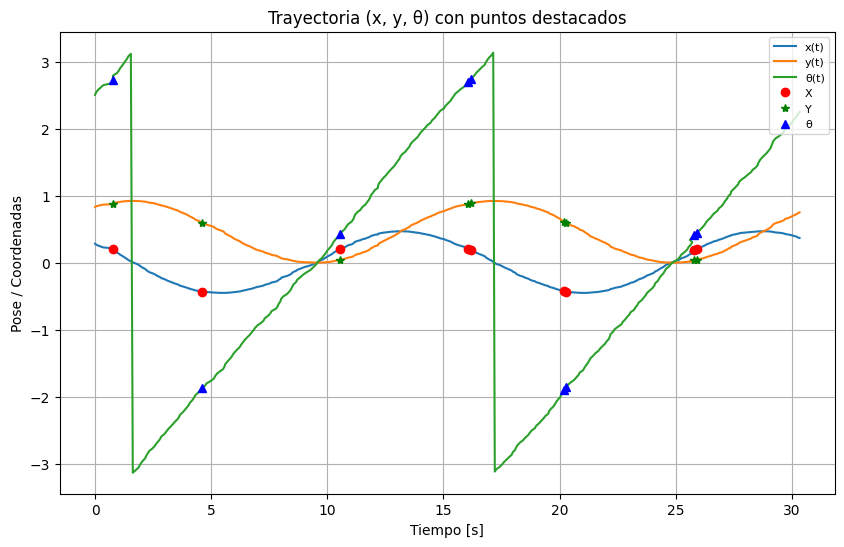

In [6]:
import matplotlib.pyplot as plt

# -------------------------------
# Trayectoria respecto al tiempo
# -------------------------------
plt.figure(figsize=(10,6))

# Graficar x(t), y(t), theta(t)
plt.plot(data["t_rel"], data["x"], label="x(t)")
plt.plot(data["t_rel"], data["y"], label="y(t)")
plt.plot(data["t_rel"], data["theta"], label="θ(t)")

# Marcar los mismos puntos
plt.plot(data.loc[idx_x_02, "t_rel"], data.loc[idx_x_02, "x"], 'ro', label="X")
plt.plot(data.loc[idx_x_02, "t_rel"], data.loc[idx_x_02, "y"], 'g*', label="Y")
plt.plot(data.loc[idx_x_02, "t_rel"], data.loc[idx_x_02, "theta"], 'b^', label="θ")

plt.plot(data.loc[idx_y_06_x_neg, "t_rel"], data.loc[idx_y_06_x_neg, "x"], 'ro')
plt.plot(data.loc[idx_y_06_x_neg, "t_rel"], data.loc[idx_y_06_x_neg, "y"], 'g*')
plt.plot(data.loc[idx_y_06_x_neg, "t_rel"], data.loc[idx_y_06_x_neg, "theta"], 'b^')

plt.xlabel("Tiempo [s]")
plt.ylabel("Pose / Coordenadas")
plt.title("Trayectoria (x, y, θ) con puntos destacados")
plt.legend(loc="upper right", fontsize=8)
plt.grid()
plt.show()
